In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

In [4]:
customers_df = pd.read_csv(customers_url)
products_df = pd.read_csv(products_url)
transactions_df = pd.read_csv(transactions_url)

In [5]:
customer_product_df = transactions_df.merge(customers_df, on='CustomerID')
customer_product_df = customer_product_df.merge(products_df, on='ProductID')

In [6]:
customer_agg = customer_product_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionDate': 'count'  # Number of transactions
}).reset_index()

In [7]:
customer_agg['AvgTransactionValue'] = customer_agg['TotalValue'] / customer_agg['TransactionDate']


In [8]:
customer_data = pd.merge(customers_df, customer_agg, on='CustomerID')


In [9]:
features = ['TotalValue', 'Quantity', 'TransactionDate', 'AvgTransactionValue']
X = customer_data[features]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


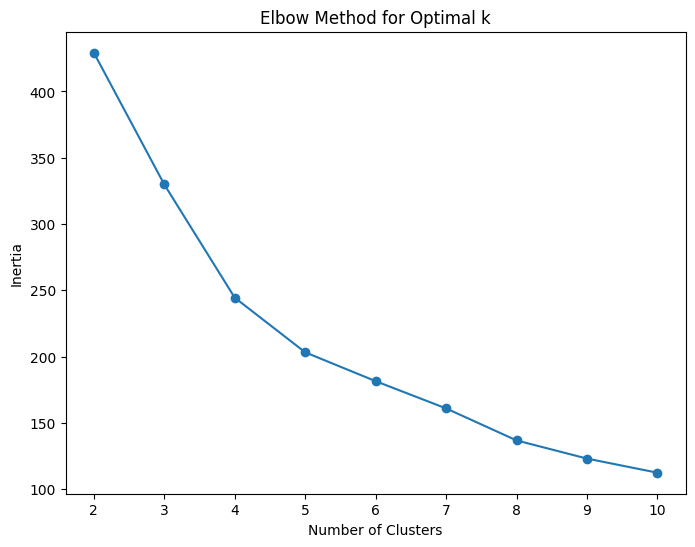

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [13]:
n_clusters = 4


In [14]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

In [15]:
db_index = davies_bouldin_score(X_scaled, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.9738828120215354


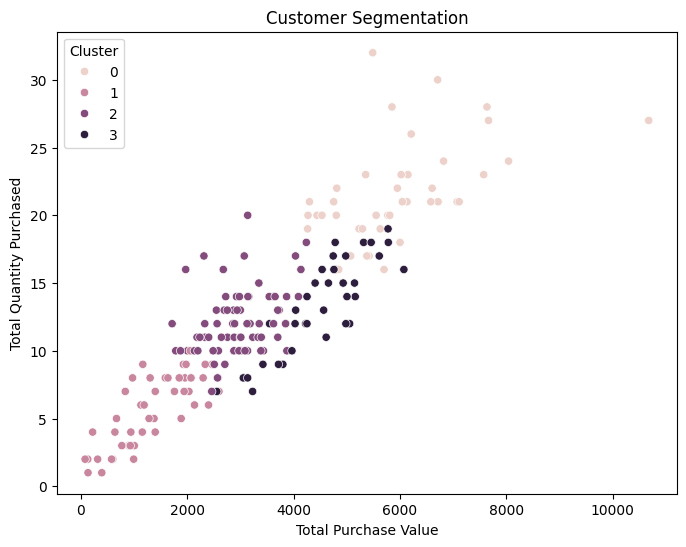

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_data)
plt.xlabel('Total Purchase Value')
plt.ylabel('Total Quantity Purchased')
plt.title('Customer Segmentation')
plt.show()

In [18]:
cluster_profiles = customer_data.groupby('Cluster').mean(numeric_only=True)
print(cluster_profiles)

          TotalValue   Quantity  TransactionDate  AvgTransactionValue
Cluster                                                              
0        5958.002927  21.682927         8.024390           750.145534
1        1366.815714   5.673469         2.489796           559.811912
2        2962.509028  12.194444         5.263889           578.101625
3        4471.427568  13.297297         4.594595          1000.496991


In [19]:
print(f"Number of Clusters: {n_clusters}")
print(f"Davies-Bouldin Index: {db_index}")
print("Cluster Profiles:")
print(cluster_profiles)

Number of Clusters: 4
Davies-Bouldin Index: 0.9738828120215354
Cluster Profiles:
          TotalValue   Quantity  TransactionDate  AvgTransactionValue
Cluster                                                              
0        5958.002927  21.682927         8.024390           750.145534
1        1366.815714   5.673469         2.489796           559.811912
2        2962.509028  12.194444         5.263889           578.101625
3        4471.427568  13.297297         4.594595          1000.496991
